Real Canadian Superstore Grocery Product Data - April 2025

📊 Price Comparison

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

In [2]:
df = pd.read_csv('grocery_data_apr_2025.csv')

In [3]:
df_clean = df[['productId', 'brand', 'title', 'pricing.price', 'pricing.wasPrice']].copy()

In [4]:
df_clean = df_clean[df_clean['pricing.wasPrice'].notnull()]

In [5]:
df_clean['pricing.wasPrice'] = df_clean['pricing.wasPrice'].str.replace('$', '', regex=False).astype(float)
df_clean['pricing.price'] = df_clean['pricing.price'].astype(float)

In [6]:
df_clean.rename(columns={
    'pricing.price': 'current_price',
    'pricing.wasPrice': 'previous_price'
}, inplace=True)

In [7]:
df_clean['price_change'] = df_clean['current_price'] - df_clean['previous_price']

In [8]:
total_increase = (df_clean['price_change'] > 0).sum()
total_decrease = (df_clean['price_change'] < 0).sum()

In [9]:
if total_increase >= total_decrease:
    top_change = df_clean.sort_values(by='price_change', ascending=False).head(10)
    chart_title = "Top 10 Most Increased Product Prices"
    bar_color = 'green'
else:
    top_change = df_clean.sort_values(by='price_change').head(10)
    chart_title = "Top 10 Most Decreased Product Prices"
    bar_color = 'red'

In [10]:
print(chart_title)
print(tabulate(top_change[['productId', 'brand', 'title', 'previous_price', 'current_price', 'price_change']], headers='keys', tablefmt='pretty'))

Top 10 Most Decreased Product Prices
+------+-------------+-----------------+------------------------------------------+----------------+---------------+---------------------+
|      |  productId  |      brand      |                  title                   | previous_price | current_price |    price_change     |
+------+-------------+-----------------+------------------------------------------+----------------+---------------+---------------------+
| 924  | 20820521_KG |       nan       |    Beef Inside Round Roast Club Pack     |     46.52      |     27.12     | -19.400000000000002 |
| 901  | 21092457_EA | Webber Naturals |    Collagen30 with Biotin 120 Tablets    |     33.49      |     25.11     | -8.380000000000003  |
| 3189 | 21092457_EA | Webber Naturals |    Collagen30 with Biotin 120 Tablets    |     33.49      |     25.11     | -8.380000000000003  |
| 7028 | 21241283_EA |    NutraVege    | Liquid Omega-3 Plant Zesty Lemon Flavour |     49.99      |     42.49     |        -7.5 

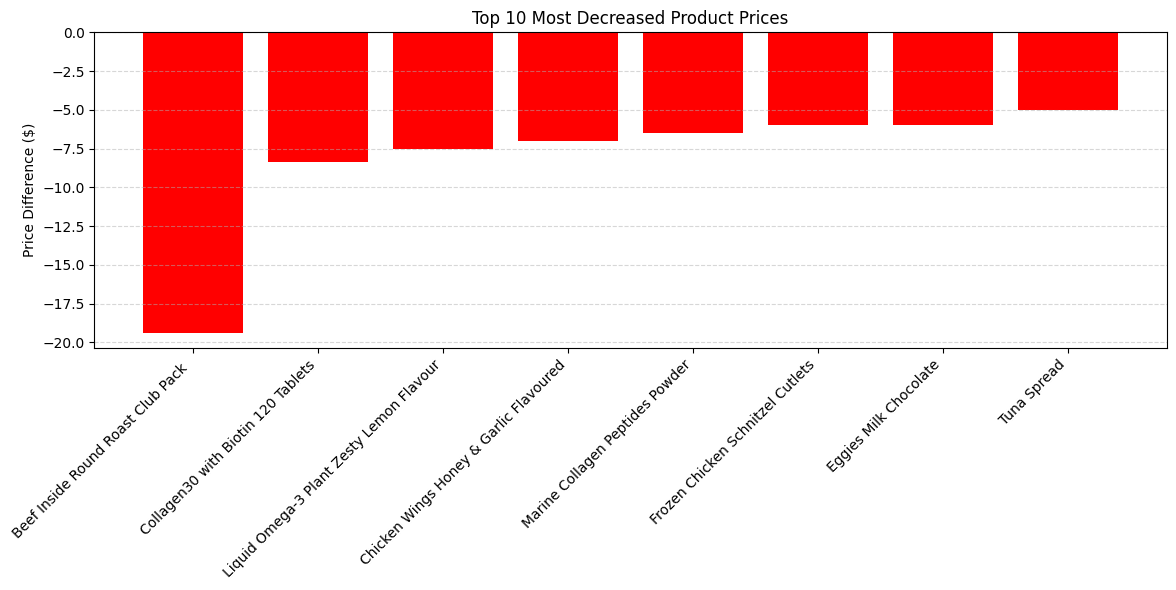

In [11]:
plt.figure(figsize=(12, 6))
plt.bar(top_change['title'], top_change['price_change'], color=bar_color)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Price Difference ($)')
plt.title(chart_title)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [12]:
export_df = df_clean[['productId', 'brand', 'title', 'previous_price', 'current_price', 'price_change']]

In [13]:
export_df.to_csv('price_difference_report.csv', index=False)

📦 Inventory Management

In [14]:
df = df[['brand', 'title', 'pricing.price', 'pricing.wasPrice', 'deal.dealPrice', 'deal.expiryDate']]

In [15]:
# Product Count per Brand
product_count_by_brand = df['brand'].value_counts().reset_index()
product_count_by_brand.columns = ['brand', 'product_count']
print(tabulate(product_count_by_brand.head(), headers='keys', tablefmt='pretty'))

+---+--------------------+---------------+
|   |       brand        | product_count |
+---+--------------------+---------------+
| 0 | President's Choice |     1050      |
| 1 |      No Name       |      462      |
| 2 |    PC Organics     |      195      |
| 3 |    PC Blue Menu    |      146      |
| 4 |     Club House     |      89       |
+---+--------------------+---------------+


In [16]:
# Products on Discount
discounted_products = df[df['deal.dealPrice'].notna()]
print(tabulate(discounted_products[['title', 'pricing.price', 'deal.dealPrice', 'deal.expiryDate']].head(), headers='keys', tablefmt='pretty'))

+----+---------------------------------------------------------------------------+---------------+----------------+----------------------+
|    |                                   title                                   | pricing.price | deal.dealPrice |   deal.expiryDate    |
+----+---------------------------------------------------------------------------+---------------+----------------+----------------------+
| 2  |                                 Cilantro                                  |      0.5      |      0.5       | 2025-04-10T00:00:00Z |
| 3  |                           Garlic Bulbs, 3-count                           |     0.77      |      0.77      |         nan          |
| 6  |                          Ritz Original Crackers                           |     1.99      |      1.99      | 2025-04-09T00:00:00Z |
| 10 | Almond For Coffee, Vanilla Flavour, Plant Based Dairy Free Coffee Creamer |     4.79      |      4.79      | 2025-04-09T00:00:00Z |
| 11 |         Almond Milk 

In [17]:
# Products with Price Drop
df = df[df['pricing.wasPrice'].notna()].copy()
df['pricing.price'] = df['pricing.price'].replace('[\$,]', '', regex=True).astype(float)
df['pricing.wasPrice'] = df['pricing.wasPrice'].replace('[\$,]', '', regex=True)
df['pricing.wasPrice'] = pd.to_numeric(df['pricing.wasPrice'], errors='coerce')
price_drop = df[df['pricing.wasPrice'] > df['pricing.price']]
print(tabulate(price_drop[['title', 'pricing.wasPrice', 'pricing.price']].head(), headers='keys', tablefmt='pretty'))

+----+--------------------------------------+------------------+---------------+
|    |                title                 | pricing.wasPrice | pricing.price |
+----+--------------------------------------+------------------+---------------+
| 17 |           Purple Eggplants           |       3.76       |     2.47      |
| 18 |          Plantains, Single           |       1.08       |     0.92      |
| 52 | Naturally Imperfect Lemons, 4 lb Bag |       8.0        |      7.0      |
| 56 |   Mini Eggs Chocolatey Candy Eggs    |       9.99       |      9.0      |
| 59 | Goat’s Milk Cheddar Cheese-Aged 1yr  |       9.0        |      8.0      |
+----+--------------------------------------+------------------+---------------+


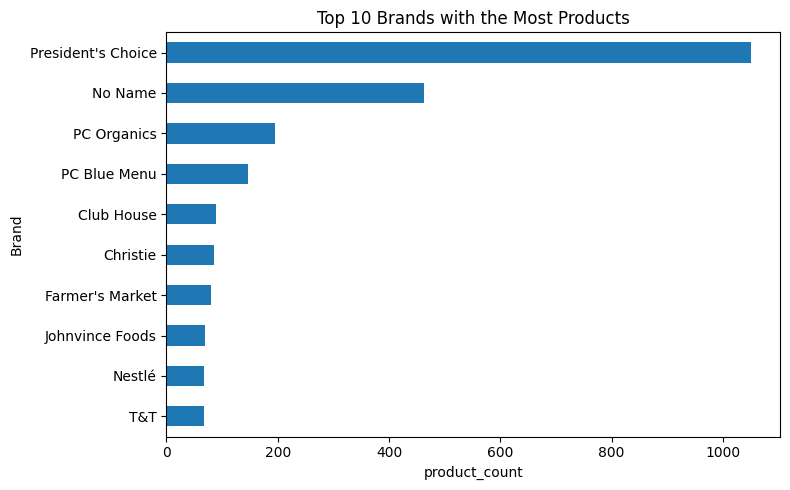

In [18]:
product_count_by_brand.head(10).plot(kind='barh', x='brand', y='product_count', figsize=(8, 5), legend=False)
plt.xlabel("product_count")
plt.ylabel("Brand")
plt.title("Top 10 Brands with the Most Products")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

🎯 Retail Product Trends Overview 📊🛒

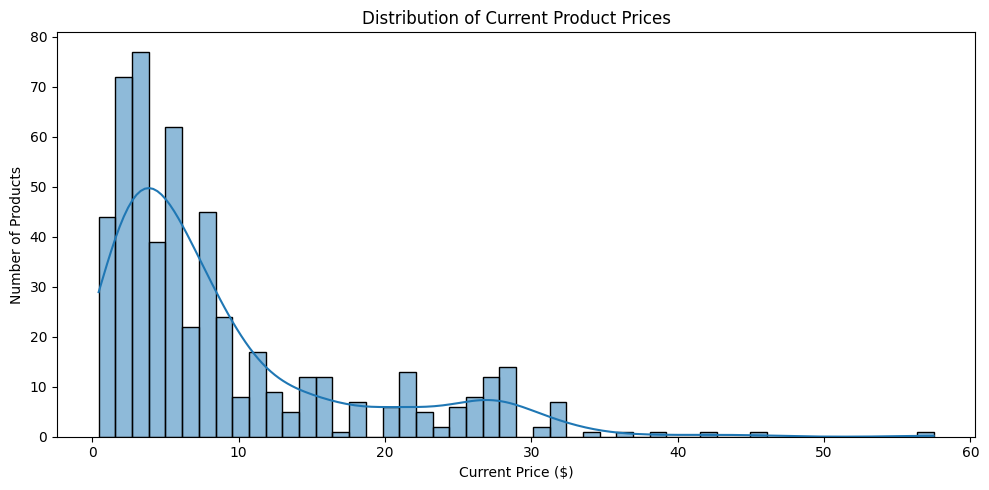

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(df['pricing.price'], bins=50, kde=True)
plt.title('Distribution of Current Product Prices')
plt.xlabel('Current Price ($)')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

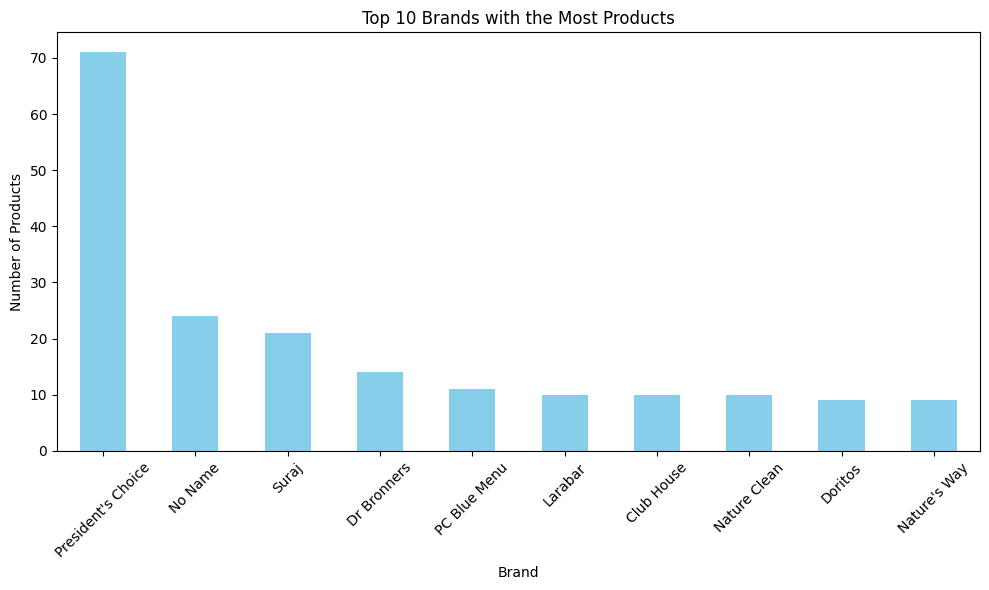

In [20]:
plt.figure(figsize=(10, 6))
df['brand'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Brands with the Most Products')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
df['price_change'] = df['pricing.price'] - df['pricing.wasPrice']

<ipython-input-22-1905545346>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_change', y='title', data=top_increase, palette='Reds_r')


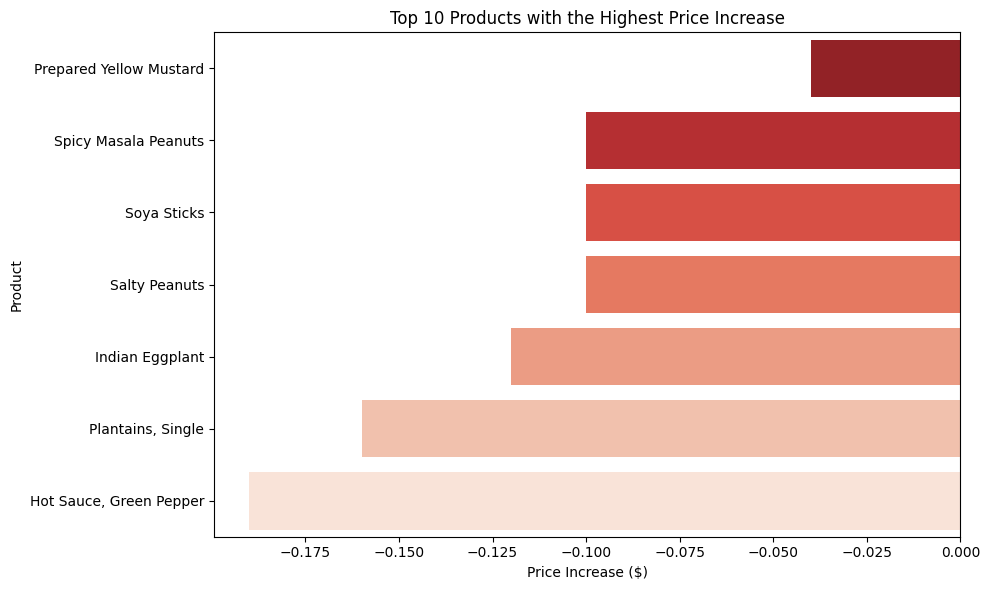

In [22]:
top_increase = df.sort_values('price_change', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='price_change', y='title', data=top_increase, palette='Reds_r')
plt.title('Top 10 Products with the Highest Price Increase')
plt.xlabel('Price Increase ($)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

<ipython-input-23-460632298>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_change', y='title', data=top_drop, palette='Greens')


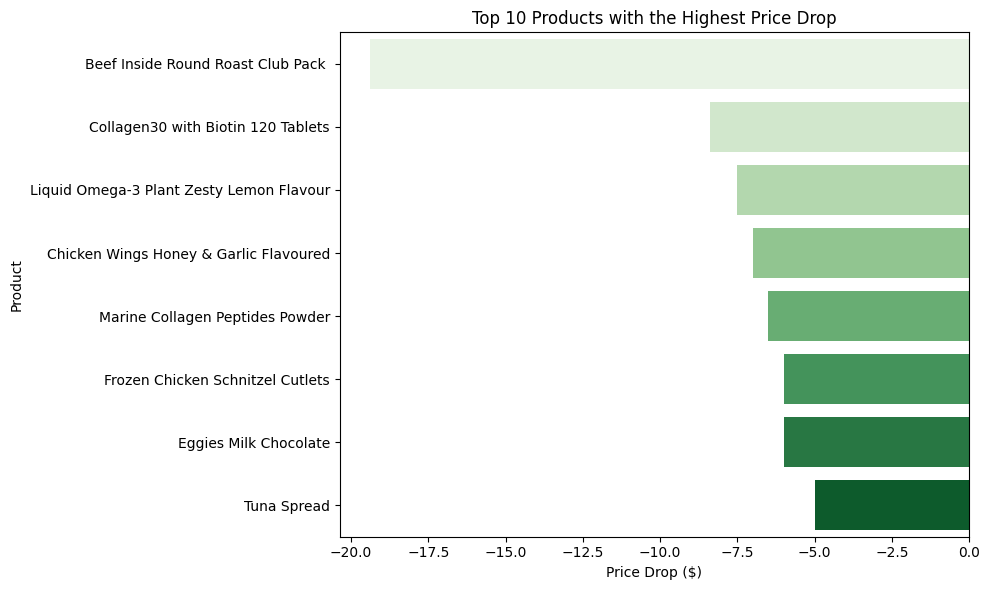

In [23]:
top_drop = df.sort_values('price_change').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='price_change', y='title', data=top_drop, palette='Greens')
plt.title('Top 10 Products with the Highest Price Drop')
plt.xlabel('Price Drop ($)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()